In [74]:
import torch
from torch import nn
import torch.nn.functional as F

# Import visualization library
import matplotlib.pyplot as plt


torch.__version__

'2.1.0+cu121'

In [75]:
# Check to see if we have a GPU to use for training
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('A {} device was detected.'.format(device))


if device=='cuda':
    print (torch.cuda.get_device_name(device=device))

A cpu device was detected.


In [76]:
# Use Pandas to do our dataprocessing on the dataset
import numpy as np
import pandas as pd
import requests
api_url = "https://debt-api-4301881a2ff8.herokuapp.com/loan/get_all"
res = requests.get(api_url)
df = pd.DataFrame(res.json()["data"])
df = df. drop('loan_id', axis=1)
df.head()

,gender,married,dependents,education,self_employed,applicantIncome,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,5849,0,12000,12.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508,12800,12.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0,6600,12.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358,12000,12.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0,14100,12.0,1.0,Urban,Y


In [77]:
df.head()

,gender,married,dependents,education,self_employed,applicantIncome,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,5849,0,12000,12.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508,12800,12.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0,6600,12.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358,12000,12.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0,14100,12.0,1.0,Urban,Y


In [78]:
# Check the size/shape of our dataset
df.dtypes

gender                 object
married                object
dependents             object
education              object
self_employed          object
applicantIncome         int64
coapplicant_income     object
loan_amount             int64
loan_amount_term      float64
credit_history        float64
property_area          object
loan_status            object
dtype: object

In [79]:
df.isnull().sum()

gender                13
married                3
dependents            15
education              0
self_employed          2
applicantIncome        0
coapplicant_income     0
loan_amount            0
loan_amount_term       0
credit_history        50
property_area          0
loan_status            0
dtype: int64

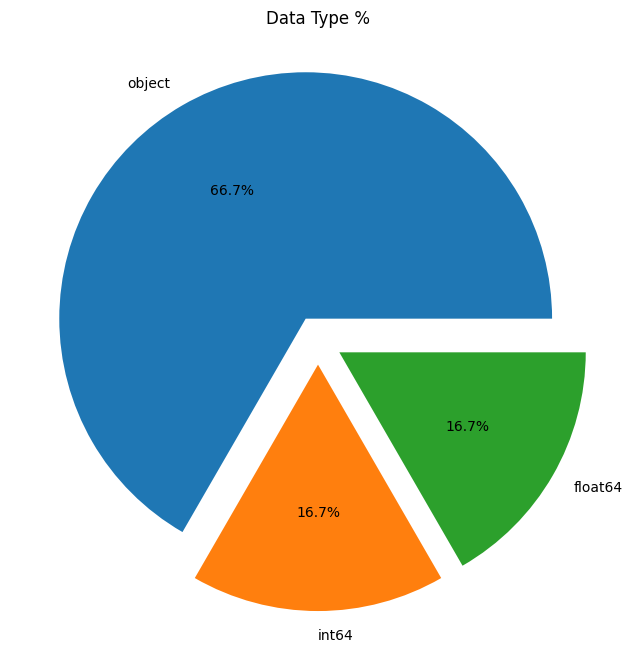

In [80]:
plt.figure(figsize=(8,8))
df.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',)

plt.title('Data Type %')
plt.show()

In [81]:
#Missing value
df['gender'].fillna(df['gender'].mode()[0], inplace=True)

df['married'].fillna(df['married'].mode()[0], inplace=True)

df['dependents'].fillna(df['dependents'].mode()[0.0], inplace=True)

df['self_employed'].fillna(df['self_employed'].mode()[0], inplace=True)

df['loan_amount_term'].fillna(df['loan_amount_term'].mode()[0], inplace=True)

df['credit_history'].fillna(df['credit_history'].mode()[0], inplace=True)

df['loan_amount'].fillna(df['loan_amount'].mean(), inplace=True)

df.isnull().sum()

gender                0
married               0
dependents            0
education             0
self_employed         0
applicantIncome       0
coapplicant_income    0
loan_amount           0
loan_amount_term      0
credit_history        0
property_area         0
loan_status           0
dtype: int64

In [82]:
df.head()

,gender,married,dependents,education,self_employed,applicantIncome,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,5849,0,12000,12.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508,12800,12.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0,6600,12.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358,12000,12.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0,14100,12.0,1.0,Urban,Y


In [83]:
from sklearn.preprocessing import LabelEncoder

In [84]:
le_gender = LabelEncoder()
df['gender'] = le_gender.fit_transform(df['gender'])

le_married = LabelEncoder()
df['married'] = le_married.fit_transform(df['married'])

le_education = LabelEncoder()
df['education'] = le_education.fit_transform(df['education'])

le_self_employed = LabelEncoder()
df['self_employed'] = le_self_employed.fit_transform(df['self_employed'])

le_property_area = LabelEncoder()
df['property_area'] = le_property_area.fit_transform(df['property_area'])

le_loan_status = LabelEncoder()
df['loan_status'] = le_loan_status.fit_transform(df['loan_status'])

In [85]:
df.head()

,gender,married,dependents,education,self_employed,applicantIncome,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,0,5849,0,12000,12.0,1.0,2,1
1,1,1,1,0,0,4583,1508,12800,12.0,1.0,0,0
2,1,1,0,0,1,3000,0,6600,12.0,1.0,2,1
3,1,1,0,1,0,2583,2358,12000,12.0,1.0,2,1
4,1,0,0,0,0,6000,0,14100,12.0,1.0,2,1


In [86]:
x = df.drop('loan_status',axis=1)
y = df['loan_status']

In [87]:
cols = ['gender','married','dependents','education','self_employed','applicantIncome','coapplicant_income','loan_amount','loan_amount_term']

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
st = StandardScaler()
x[cols]=st.fit_transform(x[cols])

In [90]:
x

,gender,married,dependents,education,self_employed,applicantIncome,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area
0,0.472343,-1.372089,-0.735646,-0.528362,-0.403582,0.072991,-0.554487,-0.282557,0.279683,1.0,2
1,0.472343,0.728816,0.259258,-0.528362,-0.403582,-0.134412,-0.038732,-0.188562,0.279683,1.0,0
2,0.472343,0.728816,-0.735646,-0.528362,2.477808,-0.393747,-0.554487,-0.917017,0.279683,1.0,2
3,0.472343,0.728816,-0.735646,1.892641,-0.403582,-0.462062,0.251980,-0.282557,0.279683,1.0,2
4,0.472343,-1.372089,-0.735646,-0.528362,-0.403582,0.097728,-0.554487,-0.035822,0.279683,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.735646,-0.528362,-0.403582,-0.410130,-0.554487,-0.858271,0.279683,1.0,0
610,0.472343,0.728816,2.249066,-0.528362,-0.403582,-0.212557,-0.554487,-1.222498,-2.499049,1.0,0
611,0.472343,0.728816,0.259258,-0.528362,-0.403582,0.437174,-0.472404,1.280097,0.279683,1.0,2
612,0.472343,0.728816,1.254162,-0.528362,-0.403582,0.357064,-0.554487,0.504645,0.279683,1.0,2


In [91]:
x.dependents

0     -0.735646
1      0.259258
2     -0.735646
3     -0.735646
4     -0.735646
         ...   
609   -0.735646
610    2.249066
611    0.259258
612    1.254162
613   -0.735646
Name: dependents, Length: 614, dtype: float64

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=8)

In [94]:
x

,gender,married,dependents,education,self_employed,applicantIncome,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area
0,0.472343,-1.372089,-0.735646,-0.528362,-0.403582,0.072991,-0.554487,-0.282557,0.279683,1.0,2
1,0.472343,0.728816,0.259258,-0.528362,-0.403582,-0.134412,-0.038732,-0.188562,0.279683,1.0,0
2,0.472343,0.728816,-0.735646,-0.528362,2.477808,-0.393747,-0.554487,-0.917017,0.279683,1.0,2
3,0.472343,0.728816,-0.735646,1.892641,-0.403582,-0.462062,0.251980,-0.282557,0.279683,1.0,2
4,0.472343,-1.372089,-0.735646,-0.528362,-0.403582,0.097728,-0.554487,-0.035822,0.279683,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.735646,-0.528362,-0.403582,-0.410130,-0.554487,-0.858271,0.279683,1.0,0
610,0.472343,0.728816,2.249066,-0.528362,-0.403582,-0.212557,-0.554487,-1.222498,-2.499049,1.0,0
611,0.472343,0.728816,0.259258,-0.528362,-0.403582,0.437174,-0.472404,1.280097,0.279683,1.0,2
612,0.472343,0.728816,1.254162,-0.528362,-0.403582,0.357064,-0.554487,0.504645,0.279683,1.0,2


In [95]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((552, 11), (62, 11), (552,), (62,))

In [96]:
from sklearn import datasets, metrics
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel

In [ ]:
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [ ]:
ypred = regressor.predict(x_test)
ypred = np.round(ypred)
print(ypred)
accuracy_score= metrics.accuracy_score(y_test, ypred)
print("*****************")
print("Regression accuracy :", accuracy_score)

print()
print("classification_report")
print(classification_report(y_test, ypred))
print("*****************")

sel = SelectFromModel(regressor)
sel.fit(x, y)
selected_features = sel.transform(x)
print(sel.get_support())
print(df.shape)
print(selected_features.shape)


CM = confusion_matrix(y_test, ypred)
print('Confusion Matrix is : \n', CM)

#sns.heatmap(CM, center=True)
#plt.show()

[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.]
*****************
Regression accuracy : 0.8709677419354839

classification_report
              precision    recall  f1-score   support

           0       0.77      0.67      0.71        15
           1       0.90      0.94      0.92        47

    accuracy                           0.87        62
   macro avg       0.83      0.80      0.82        62
weighted avg       0.87      0.87      0.87        62

*****************
[False False False False False  True  True  True False  True False]
(614, 12)
(614, 4)
Confusion Matrix is : 
 [[10  5]
 [ 3 44]]


In [97]:
import pickle

In [ ]:

with open ('RFRegression.pkl' , 'wb') as file :
   pickle.dump(regressor , file)


In [102]:
model = pickle.load(open('/content/RFRegression.pkl', 'rb'))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.3.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


ValueError: node array from the pickle has an incompatible dtype:
- expected: [('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]
- got     : {'names': ['left_child', 'right_child', 'feature', 'threshold', 'impurity', 'n_node_samples', 'weighted_n_node_samples', 'missing_go_to_left'], 'formats': ['<i8', '<i8', '<i8', '<f8', '<f8', '<i8', '<f8', 'u1'], 'offsets': [0, 8, 16, 24, 32, 40, 48, 56], 'itemsize': 64}

In [ ]:
test_input = pd.DataFrame({
    'gender':'Male',
    'married':'Yes',
    'dependents':0,
    'education':'Graduate',
    'self_employed':'No',
    'applicantIncome':3036,
    'coapplicant_income':2504,
    'loan_amount':15800,
    'loan_amount_term':12,
    'credit_history':0,
    'property_area': 'Semiurban'
},index=[0])

test_input['gender']= le_gender.fit_transform(test_input['gender'])
test_input['married']= le_married.fit_transform(test_input['married'])
test_input['education']= le_education.fit_transform(test_input['education'])
test_input['self_employed']= le_self_employed.fit_transform(test_input['self_employed'])
test_input['property_area']= le_property_area.fit_transform(test_input['property_area'])

In [ ]:
result = model.predict(test_input)
result = np.round(result).astype(int)
result

array([1])

In [ ]:
le_loan_status.inverse_transform(result)

array(['Y'], dtype=object)

In [105]:
!pip install scikit-learn==0.20.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 60.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scikit-learn
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
ERROR: Could not build wheels for scikit-learn, which is required to install pyproject.toml-based projects
